In [27]:
import pandas as pd
from scipy import stats
from math import sqrt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

Would the campaign be successful?
If the campaign was successful, how much of that success could be attributed to the ads?
With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

Data dictionary:

Index: Row index

user id: User ID (unique)

test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

converted: If a person bought the product then True, else is False
total ads: Amount of ads seen by person

most ads day: Day that the person saw the biggest amount of ads

most ads hour: Hour of day that the person saw the biggest amount of ads

In [5]:
data = pd.read_csv('marketing_AB.csv')
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [11]:
data = data.drop(['Unnamed: 0'], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [13]:
data.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [14]:
data

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


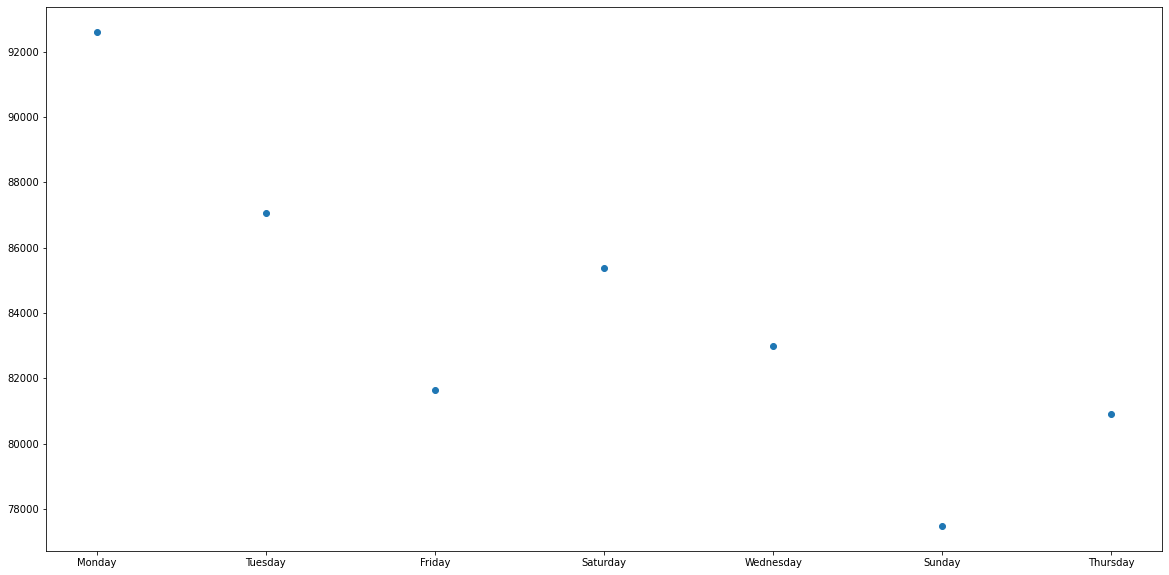

In [66]:
plt.figure(figsize=(20, 10))
plt.scatter(data['most ads day'].unique(), data.groupby(['most ads day'])['most ads hour'].count().values)
plt.show()

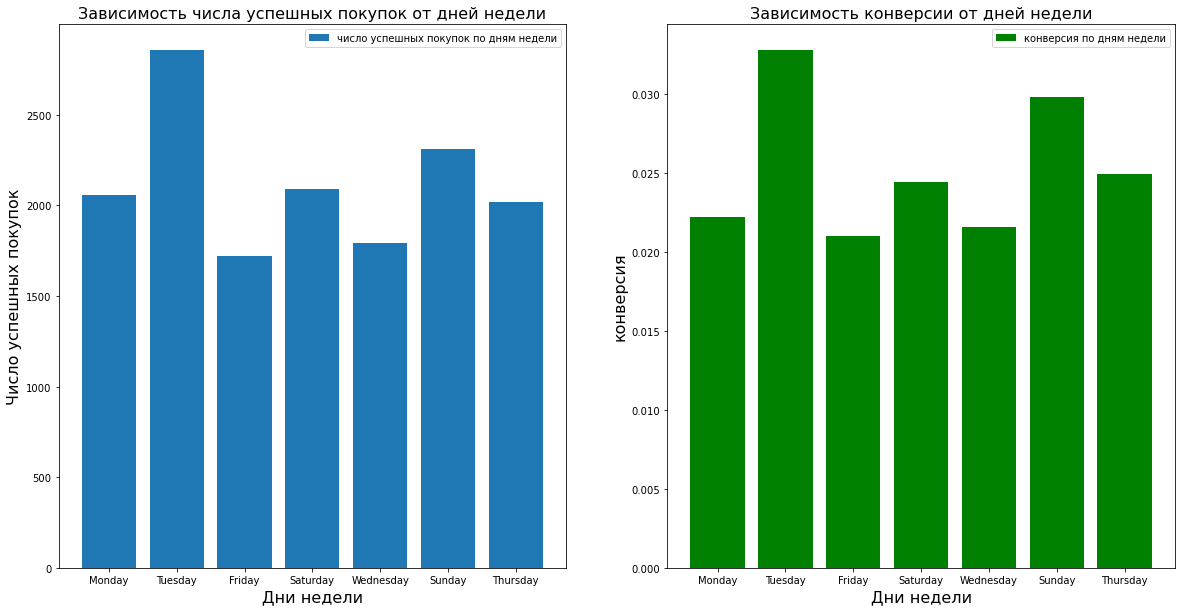

In [51]:
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.bar(data['most ads day'].unique(), data.groupby(['most ads day'])['converted'].sum().values, label='число успешных покупок по дням недели') #Параметр label позволяет задать название величины для легенды
ax.set_xlabel('Дни недели', fontdict = {'fontsize' : 16})
ax.set_ylabel('Число успешных покупок', fontdict = {'fontsize' : 16})
ax.set_title('Зависимость числа успешных покупок от дней недели', fontdict = {'fontsize' : 16})
ax.legend()

ax2.bar(data['most ads day'].unique(), data.groupby(['most ads day'])['converted'].mean().values, label='конверсия по дням недели', color = 'green') #Параметр label позволяет задать название величины для легенды
ax2.set_xlabel('Дни недели', fontdict = {'fontsize' : 16})
ax2.set_ylabel('конверсия', fontdict = {'fontsize' : 16})
ax2.set_title('Зависимость конверсии от дней недели', fontdict = {'fontsize' : 16})
ax2.legend()

plt.show()

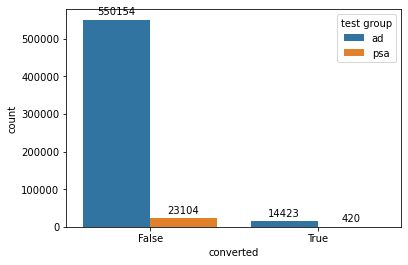

In [56]:
ax = sns.countplot(x="converted", hue="test group", data=data)

# Get the counts for each bar
counts = data.groupby(["test group", "converted"]).size().reset_index(name="count")

# Add text to each bar
for i, bar in enumerate(ax.containers):
    for j, count in enumerate(bar):
        height = count.get_height()
        ax.annotate(counts.iloc[i*2+j]["count"], xy=(count.get_x() + count.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

plt.show()

T-test

In [60]:
ttest_results = stats.ttest_ind(data[data["test group"] == "ad"]["converted"], data[data["test group"] == "psa"]["converted"])
print(ttest_results)

Ttest_indResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13)


p-value < 0.05, H0 rejected.

Манна-Уитни 

In [64]:
mwtest = stats.mannwhitneyu(data[data["test group"] == "ad"]["converted"], data[data["test group"] == "psa"]["converted"])
print(mwtest)

MannwhitneyuResult(statistic=6589472518.0, pvalue=8.526808965086185e-14)


p-value < 0.05, H0 rejected.

Simulated user-aggregated data from an experiment with webpage views and button clicks attributes. Can be very useful for preparing for interviews and practicing statistical tests. The data was prepared using a special selection of parameters: success_rate, uplift, beta, skew

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
from statsmodels.stats.power import TTestIndPower
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
df = pd.read_csv('ab_test_results_aggregated_views_clicks_2.csv')
df.head()

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0
3,4,control,2.0,0.0
4,5,control,3.0,0.0


In [11]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)
    
check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 120000
Columns: 4
------------------------------- TYPES --------------------------------
user_id      int64
group       object
views      float64
clicks     float64
dtype: object
-------------------------------- HEAD --------------------------------
   user_id    group  views  clicks
0        1  control   10.0     0.0
1        2  control    1.0     0.0
2        3  control    1.0     0.0
3        4  control    2.0     0.0
4        5  control    3.0     0.0
-------------------------------- TAIL --------------------------------
        user_id group  views  clicks
119995   119996  test    9.0     0.0
119996   119997  test    2.0     1.0
119997   119998  test   20.0     1.0
119998   119999  test    6.0     1.0
119999   120000  test    2.0     0.0
--------------------------- MISSING VALUES ---------------------------
user_id    0
group      0
views      0
clicks     0
dtype: int64
------------------------- DUPLICAT

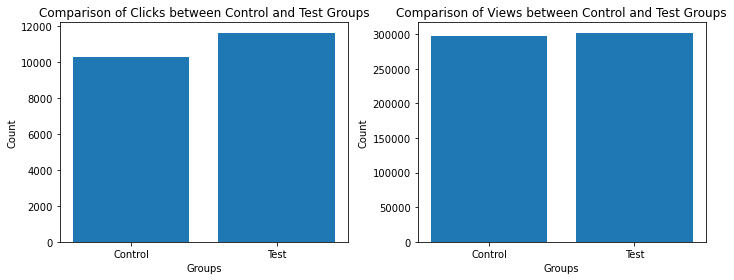

In [12]:
control_group = df[df['group'] == 'control']
test_group = df[df['group'] == 'test']

metrics = ['clicks', 'views']
groups = ['Control', 'Test']

plt.figure(figsize=(10, 4))

for i, metric in enumerate(metrics):
    plt.subplot(1, 2, i+1)
    values = [control_group[metric].sum(), test_group[metric].sum()]
    plt.bar(groups, values)
    plt.title(f'Comparison of {metric.capitalize()} between Control and Test Groups')
    plt.xlabel('Groups')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


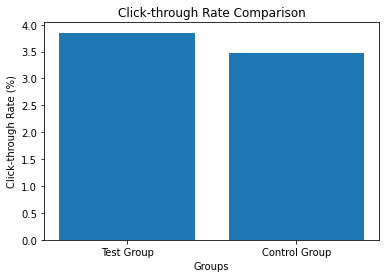

In [13]:
test_clicks = test_group['clicks'].sum()
test_views = test_group['views'].sum()
result = (test_clicks / test_views) * 100

control_views = control_group['views'].sum()
control_clicks = control_group['clicks'].sum()
result1 = (control_clicks / control_views) * 100

labels = ['Test Group', 'Control Group']
values = [result, result1]

plt.bar(labels, values)
plt.title('Click-through Rate Comparison')
plt.xlabel('Groups')
plt.ylabel('Click-through Rate (%)')
plt.show()

In [20]:
df['Convertion rate%']=df['clicks']/df['views']*100

ave_con_control= (df.loc[df['group'] == 'control', 'Convertion rate%'].sum())/(df.loc[df['group'] == 'control', 'Convertion rate%'].count())
ave_con_test=(df.loc[df['group'] == 'test', 'Convertion rate%'].sum())/(df.loc[df['group'] == 'test', 'Convertion rate%'].count())

print("The average convertion rate on test group is :",ave_con_test)
print("The average convertion rate on control group is :",ave_con_control)

The average convertion rate on test group is : 3.8647582531410847
The average convertion rate on control group is : 3.465443309280596


In [14]:
control_clicks_normality = stats.shapiro(control_group['clicks'])
test_clicks_normality = stats.shapiro(test_group['clicks'])

control_views_normality = stats.shapiro(control_group['views'])
test_views_normality = stats.shapiro(test_group['views'])

print("Shapiro-Wilk Test for Normality - Control Group:")
print("clicks:", control_clicks_normality)
print("views:", control_views_normality)
print()
print("Shapiro-Wilk Test for Normality - Test Group:")
print("clicks:", test_clicks_normality)
print("views:", test_views_normality)

Shapiro-Wilk Test for Normality - Control Group:
clicks: ShapiroResult(statistic=0.41856634616851807, pvalue=0.0)
views: ShapiroResult(statistic=0.5915559530258179, pvalue=0.0)

Shapiro-Wilk Test for Normality - Test Group:
clicks: ShapiroResult(statistic=0.43864309787750244, pvalue=0.0)
views: ShapiroResult(statistic=0.5664979219436646, pvalue=0.0)


C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


These results indicate that the distribution of both metrics ('clicks' and 'views') in the control and test groups is not normal. This indicates that non-parametric analysis methods should be used for the data, as the prerequisites for using parametric tests are not met.

We will use a non-parametric test such as the Mann-Whitney U Test to compare the control and test groups

In [17]:
test_ctr = df.loc[df['group'] == 'test', 'clicks'] / df.loc[df['group'] == 'test', 'views'] * 100
control_ctr = df.loc[df['group'] == 'control', 'clicks'] / df.loc[df['group'] == 'control', 'views'] * 100

statistic, p_value = mannwhitneyu(test_ctr, control_ctr)

print("Mann-Whitney U Test for CTR:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test for CTR:
Statistic: 1773003355.0
p-value: 4.1290096807850553e-13


In [21]:
statistic, p_value = ttest_ind(test_ctr, control_ctr)

print("T Test for CTR:")
print("Statistic:", statistic)
print("p-value:", p_value)

T Test for CTR:
Statistic: 5.871485328700074
p-value: 4.3303982506718106e-09


Гипотеза H0 (нулевая гипотеза) в данном случае утверждает, что распределения CTR в тестируемой и контрольной группах равны, т.е. между ними нет статистически значимых различий. Гипотеза H1 (альтернативная гипотеза) утверждает, что распределения CTR в тестируемой и контрольной группах различны, т.е. между ними существуют статистически значимые различия. Чрезвычайно низкое значение p (8.258019361570171e-13) указывает на то, что у нас достаточно доказательств, чтобы отвергнуть нулевую гипотезу H0. Это означает, что существуют статистически значимые различия в показателях CTR между тестируемой и контрольной группами. Учитывая чрезвычайно низкое значение p, вы можете считать эти различия статистически значимыми с практической точки зрения. В вашем случае это означает, что тестовая группа имеет статистически значимый более высокий или более низкий CTR по сравнению с контрольной группой.

In [18]:
effect_size = 0.1
alpha = 0.01
sample_size = 60000
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size=effect_size, nobs1=sample_size, alpha=alpha, ratio=1, alternative='two-sided')
print(f"Statistical power: {power}")

Statistical power: 1.0


A statistical power value of 1.0 means that our test has the maximum possible power. The statistical power indicates the probability of detecting a statistically significant difference if it actually exists. Typically, statistical power ranges from 0 to 1, where 1 indicates a full possibility of detecting a difference. In our case, a statistical power of 1.0 means that our test has a large enough sample size and a large enough effect size to detect any statistically significant difference between the control and test groups. This is a very important metric, as high power provides more reliable test results and reduces the chance of a false negative.

In [19]:
control_group_ctr = df.loc[df['group'] == 'control', 'clicks'] / df.loc[df['group'] == 'control', 'views'] * 100
experimental_group_ctr = df.loc[df['group'] == 'test', 'clicks'] / df.loc[df['group'] == 'test', 'views'] * 100

def confidence_interval_difference(metric_a, metric_b, alpha=0.05):
    mean_diff = np.mean(metric_a) - np.mean(metric_b)
    std_a = np.std(metric_a)
    std_b = np.std(metric_b)
    n_a = len(metric_a)
    n_b = len(metric_b)
    
    se_diff = np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))
    critical_value = norm.ppf(1 - alpha / 2)
    
    lower_bound = mean_diff - (critical_value * se_diff)
    upper_bound = mean_diff + (critical_value * se_diff)
    
    return (lower_bound, upper_bound)

lower, upper = confidence_interval_difference(control_group_ctr, experimental_group_ctr)

print("Confidence Interval: [", lower, ",", upper, "]")

Confidence Interval: [ -0.5326093902552441 , -0.26602049746573353 ]


Это показывает, что разница между средними значениями показателей в двух группах статистически значима и отрицательна. То есть среднее значение показателя в контрольной группе ниже, чем в экспериментальной. В нашем случае нижняя граница доверительного интервала равна -0,5326093902552058, а верхняя граница равна -0,26602049746577183. Это означает, что весьма вероятно, что разница между средними значениями показателей находится в пределах этого диапазона. Также можно отметить, что обе границы доверительного интервала являются отрицательными, что подтверждает тот факт, что среднее значение показателя в контрольной группе ниже, чем в экспериментальной.

Итак, наши результаты подтверждают, что изменение, внесенное в экспериментальную группу, положительно влияет на показатель кликабельности. Это может свидетельствовать о том, что изменения, внедренные в экспериментальной группе, способствуют повышению вовлеченности пользователей и кликабельности. Учитывая эти результаты, рекомендуется использовать изменения, внесенные экспериментальной группой, для улучшения показателей кликабельности вашего продукта.

# Fast Food Marketing Campaign A\B Test

Goal

Evaluate A/B testing results and decide which marketing strategy works the best.

Columns

MarketID: unique identifier for market

MarketSize: size of market area by sales

LocationID: unique identifier for store location

AgeOfStore: age of store in years

Promotion: one of three promotions that were tested

week: one of four weeks when the promotions were run

SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [22]:
df = pd.read_csv('WA_Marketing-Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [24]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [32]:
print(df['MarketSize'].value_counts(), '\n', df['Promotion'].value_counts(), '\n', df['week'].value_counts())

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64 
 3    188
2    188
1    172
Name: Promotion, dtype: int64 
 1    137
2    137
3    137
4    137
Name: week, dtype: int64


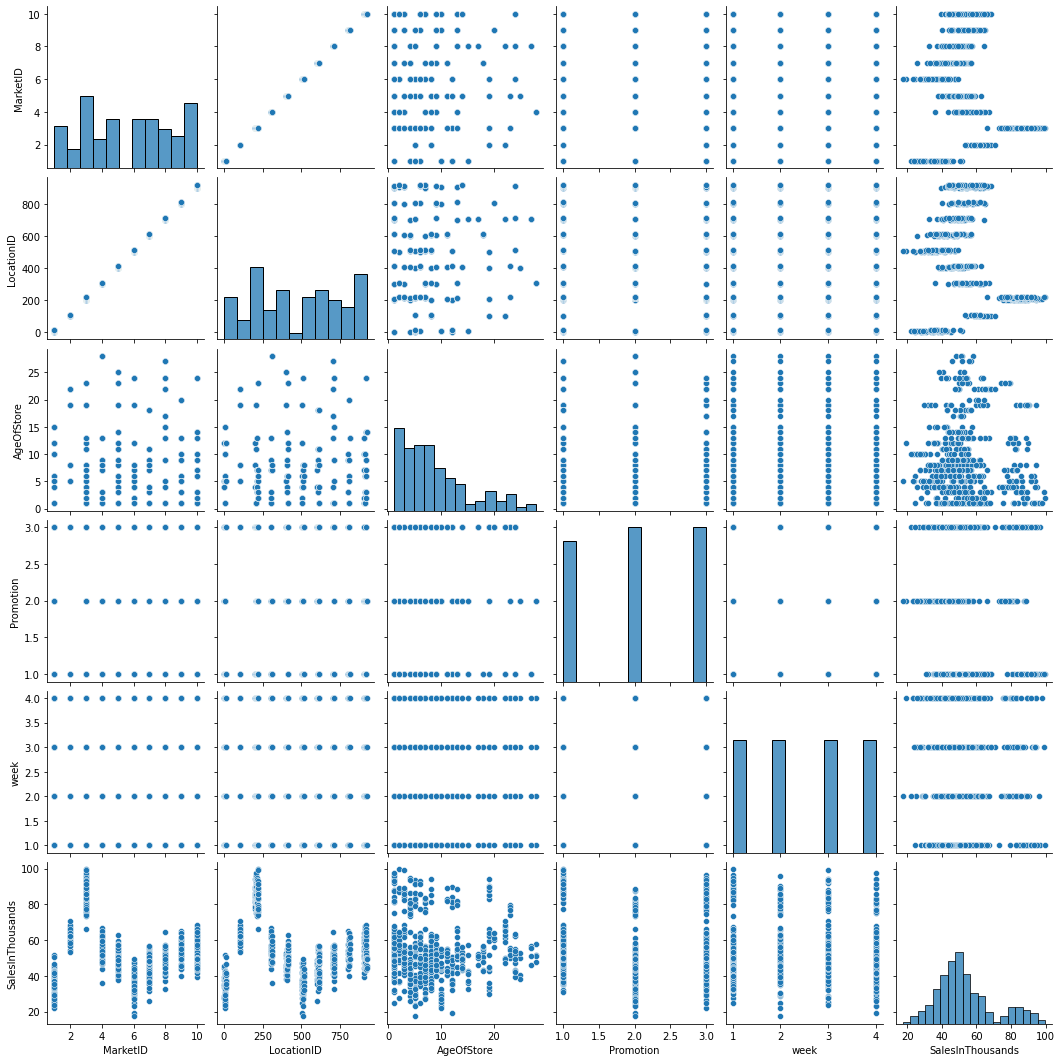

In [53]:
# Создадим матрицу диаграмм рассеяния для всех пар переменных
sns.pairplot(df)
 
# Покажем график
plt.show()

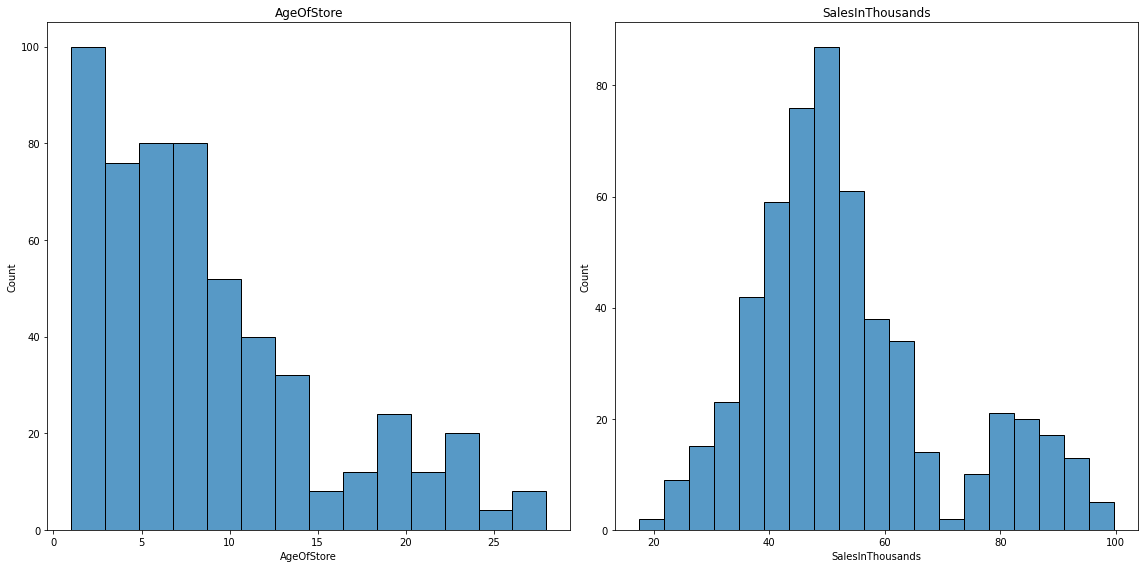

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

sns.histplot(df["AgeOfStore"], ax=ax[0])
ax[0].set(title="AgeOfStore")

sns.histplot(df["SalesInThousands"], ax=ax[1])
ax[1].set(title="SalesInThousands")

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


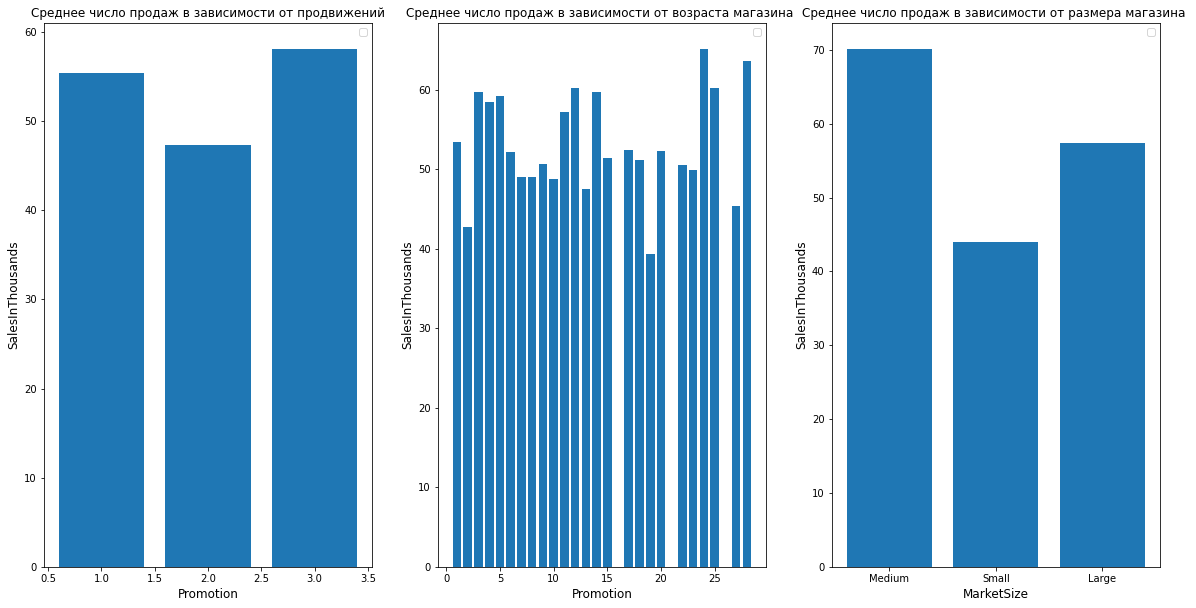

In [67]:
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(131)
# Adds subplot on position 2
ax2 = fig.add_subplot(132)

ax3 = fig.add_subplot(133)

ax.bar(df['Promotion'].unique(), df.groupby(['Promotion'])['SalesInThousands'].mean().values) #Параметр label позволяет задать название величины для легенды
ax.set_xlabel('Promotion', fontdict = {'fontsize' : 12})
ax.set_ylabel('SalesInThousands', fontdict = {'fontsize' : 12})
ax.set_title('Среднее число продаж в зависимости от продвижений', fontdict = {'fontsize' : 12})
ax.legend()

ax2.bar(df['AgeOfStore'].unique(), df.groupby(['AgeOfStore'])['SalesInThousands'].mean().values) #Параметр label позволяет задать название величины для легенды
ax2.set_xlabel('Promotion', fontdict = {'fontsize' : 12})
ax2.set_ylabel('SalesInThousands', fontdict = {'fontsize' : 12})
ax2.set_title('Среднее число продаж в зависимости от возраста магазина ', fontdict = {'fontsize' : 12})
ax2.legend()

ax3.bar(df['MarketSize'].unique(), df.groupby(['MarketSize'])['SalesInThousands'].mean().values) #Параметр label позволяет задать название величины для легенды
ax3.set_xlabel('MarketSize', fontdict = {'fontsize' : 12})
ax3.set_ylabel('SalesInThousands', fontdict = {'fontsize' : 12})
ax3.set_title('Среднее число продаж в зависимости от размера магазина ', fontdict = {'fontsize' : 12})
ax3.legend()


plt.show()

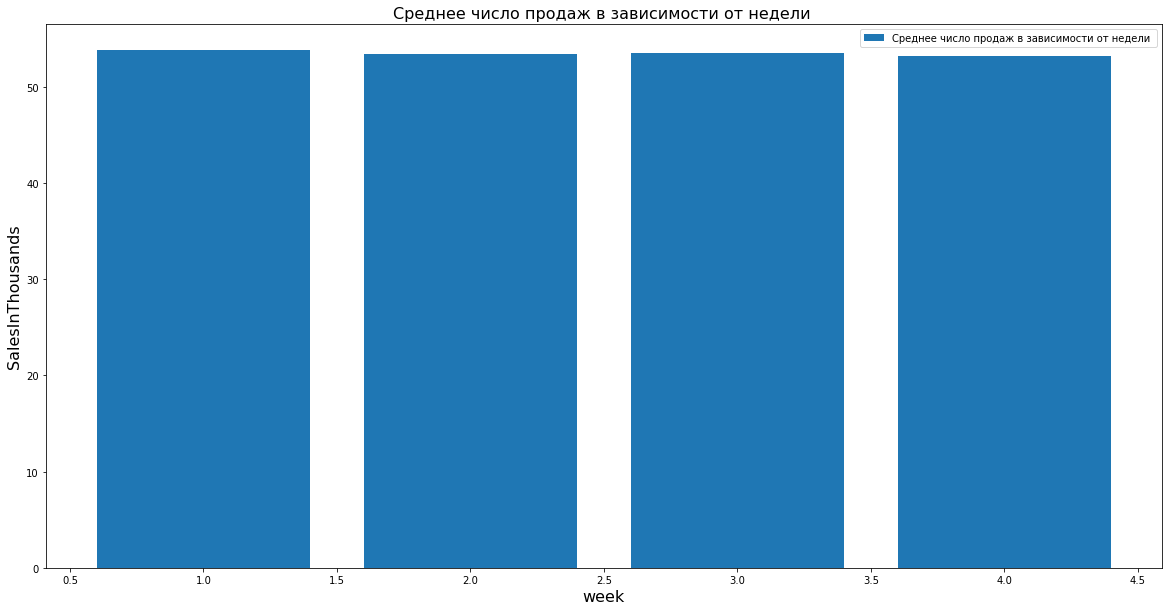

In [51]:
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(111)

ax.bar(df['week'].unique(), df.groupby(['week'])['SalesInThousands'].mean().values, label='Среднее число продаж в зависимости от недели ') #Параметр label позволяет задать название величины для легенды
ax.set_xlabel('week', fontdict = {'fontsize' : 16})
ax.set_ylabel('SalesInThousands', fontdict = {'fontsize' : 16})
ax.set_title('Среднее число продаж в зависимости от недели ', fontdict = {'fontsize' : 16})
ax.legend()

plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


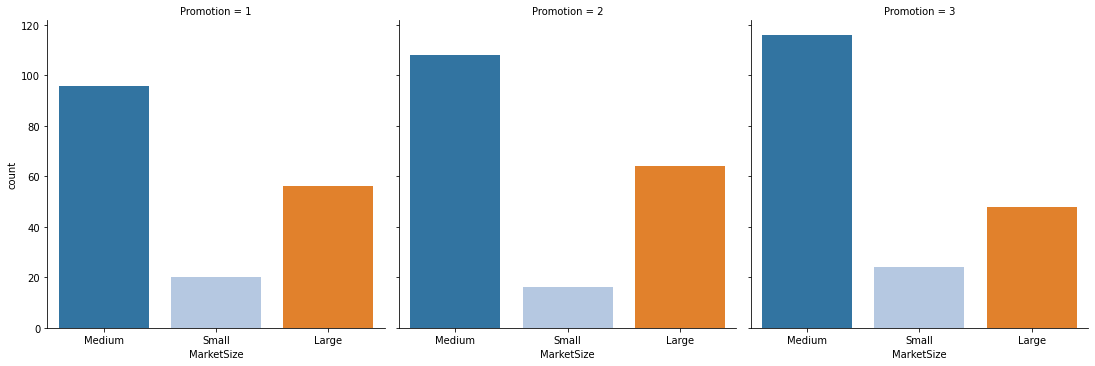

In [65]:
# Plot
sns.catplot("MarketSize", col="Promotion", col_wrap=4,
                data=df,
                kind="count", 
                palette='tab20')

plt.show()

Проверим нормальность распределения по каждому виду продвижения

In [68]:
promotion_1_sales_normality = stats.shapiro(df[df['Promotion'] == 1]['SalesInThousands'])
promotion_2_sales_normality = stats.shapiro(df[df['Promotion'] == 2]['SalesInThousands'])
promotion_3_sales_normality = stats.shapiro(df[df['Promotion'] == 3]['SalesInThousands'])


print("Shapiro-Wilk Test for Normality - promotion_1:")
print("Sales:", promotion_1_sales_normality)

print("Shapiro-Wilk Test for Normality - promotion_2:")
print("Sales:", promotion_2_sales_normality)

print("Shapiro-Wilk Test for Normality - promotion_3:")
print("Saless:", promotion_3_sales_normality)


Shapiro-Wilk Test for Normality - promotion_1:
Sales: ShapiroResult(statistic=0.9153000712394714, pvalue=1.9773297665892642e-08)
Shapiro-Wilk Test for Normality - promotion_2:
Sales: ShapiroResult(statistic=0.9145088791847229, pvalue=5.456262108793908e-09)
Shapiro-Wilk Test for Normality - promotion_3:
Saless: ShapiroResult(statistic=0.9207685589790344, pvalue=1.499518376135711e-08)


In [70]:
sales_promotion_1 = df[df['Promotion'] == 1]['SalesInThousands']
sales_promotion_2 = df[df['Promotion'] == 2]['SalesInThousands']
sales_promotion_3 = df[df['Promotion'] == 3]['SalesInThousands']

H0 - выборки не имеют статистически значимых различий

H1 - выборки имеют статистическую значимую различимость

T-test with Benferonni

In [80]:
import itertools

from scipy.stats import ttest_ind

p_benferonni = 0.05/3
groups = [sales_promotion_1, sales_promotion_2, sales_promotion_3]

pairs = [list(x) for x in itertools.combinations(range(len(groups)), 2)]  
for pair in pairs:
    promotion_number_1 = str(pair[0] + 1)
    promotion_number_2 = str(pair[1] + 1)
    
    sales_1 = groups[pair[0]]
    sales_2 = groups[pair[1]]
    stat, p = ttest_ind(sales_1, sales_2)
    if p > p_benferonni:
        print('выборки', promotion_number_1, ' ', promotion_number_2, ' ', 'не имеют статистически значимых различий', 
             'p_value = ', p)
    else:
        print('выборки', promotion_number_1, ' ', promotion_number_2, ' ', ' имеют статистически значимые различия', 
              'p_value = ', p)

выборки 1   2    имеют статистически значимые различия p_value =  3.5506696512134566e-10
выборки 1   3   не имеют статистически значимых различий p_value =  0.12079667272313273
выборки 2   3    имеют статистически значимые различия p_value =  1.562894303627738e-06


Promotion 2 имеет статистически значимые различия с другими

Kruskal-Wallis H Test

In [72]:
from scipy.stats import kruskal
stat, p = kruskal(sales_promotion_1, sales_promotion_2, sales_promotion_3)
print(stat, p)

53.29475169322799 2.6741866266697816e-12


Построим доверительные интервалы для каждой пары выборок

In [84]:
def confidence_interval_difference(metric_a, metric_b, alpha=0.05):
    mean_diff = np.mean(metric_a) - np.mean(metric_b)
    std_a = np.std(metric_a)
    std_b = np.std(metric_b)
    n_a = len(metric_a)
    n_b = len(metric_b)
    
    se_diff = np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))
    critical_value = norm.ppf(1 - alpha / 2)
    
    lower_bound = mean_diff - (critical_value * se_diff)
    upper_bound = mean_diff + (critical_value * se_diff)
    
    return (lower_bound, upper_bound)

lower, upper = confidence_interval_difference(sales_promotion_1, sales_promotion_2)

print("Confidence Interval: [", lower, ",", upper, "]")

lower, upper = confidence_interval_difference(sales_promotion_2, sales_promotion_3)

print("Confidence Interval: [", lower, ",", upper, "]")

lower, upper = confidence_interval_difference(sales_promotion_1, sales_promotion_3)

print("Confidence Interval: [", lower, ",", upper, "]")

Confidence Interval: [ 7.494802024675925 , 14.044391443904013 ]
Confidence Interval: [ -11.252674856406998 , -4.817431526571753 ]
Confidence Interval: [ -0.7002704991505433 , 6.169357584751731 ]


Можно понять, что Promotion 2 показал себя хуже остальных. В сравнении средних между 1 и 2 продвиженями, интервал содержит только положительные значения, что означает, что средняя цена продаж 1 продвижения статистически различима со средней ценой продаж 2 продвижения. Аналогично со сравнением 2 и 3 продвиженями, интервал содержит отрицательные значения. Это свидетельствует о том, что среднее значение 2 продвижения ниже 3.

Попробуем сравнить еще 1 и 3 продвижения. Интервал между средними, показал, что разница между средними может быть равна нулю, т.к. нижняя граница интервала отрицательна, а верхняя положительна.

U-тест Манна-Уитни

In [86]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(sales_promotion_1, sales_promotion_3)
print(stat, p)

14089.0 0.017542047846615602


T test

In [90]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(sales_promotion_1, sales_promotion_3)
print(stat, p)

1.5551383687293547 0.12079667272313273


Bootstrap

In [103]:
def get_percentile_ci(bootstrap_stats, pe, alpha):
    """Строит перцентильный доверительный интервал."""
    left, right = np.mean(bootstrap_stats, [alpha / 2, 1 - alpha / 2])
    return left, right

In [105]:
n = 100
B = len(sales_promotion_1)
alpha = 0.05

values_a = sales_promotion_1.values
values_b = sales_promotion_3_new

pe = np.mean(values_b, 0.5) - np.mean(values_a, 0.5)
bootstrap_values_a = np.random.choice(values_a, (B, n), True)
bootstrap_metrics_a = np.quantile(bootstrap_values_a, 0.5, axis=1)
bootstrap_values_b = np.random.choice(values_b, (B, n), True)
bootstrap_metrics_b = np.quantile(bootstrap_values_b, 0.5, axis=1)
bootstrap_stats = bootstrap_metrics_b - bootstrap_metrics_a
ci = get_percentile_ci(bootstrap_stats, pe, alpha)
has_effect = not (ci[0] < 0 < ci[1])

print(f'Значение 50% квантиля изменилось на: {pe:0.2f}')
print(f'{((1 - alpha) * 100)}% доверительный интервал: ({ci[0]:0.2f}, {ci[1]:0.2f})')
print(f'Отличия статистически значимые: {has_effect}')

Значение 50% квантиля изменилось на: 116.61
95.0% доверительный интервал: (14.97, 48.31)
Отличия статистически значимые: True


Тест Мана-Уитни показал значение ниже не намного ниже 0.05, T-test и Bootstrap не показали статистически значимые различия между выборками. Итог статистически значимых между 1 и 3 продвижениями не нашлось.